In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install sklearn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

dataset = pd.read_excel('test-subject.xlsx')
dataset = dataset.iloc[:, 0:8]

**Data Transformation**  
Categorial Data -> Numerical Data (Unique Integer Encoding)

In [4]:
numericalData = dataset.copy()

uniqueConditionValue = dataset["Condition"].unique()
numericalData["Condition"].replace({uniqueConditionValue[i]:i for i in range(len(uniqueConditionValue))}, inplace=True)

uniqueSubjectValue = dataset["Group"].unique()
numericalData["Group"].replace({uniqueSubjectValue[i]:i for i in range(len(uniqueSubjectValue))}, inplace=True)

**Correlation Heatmap**

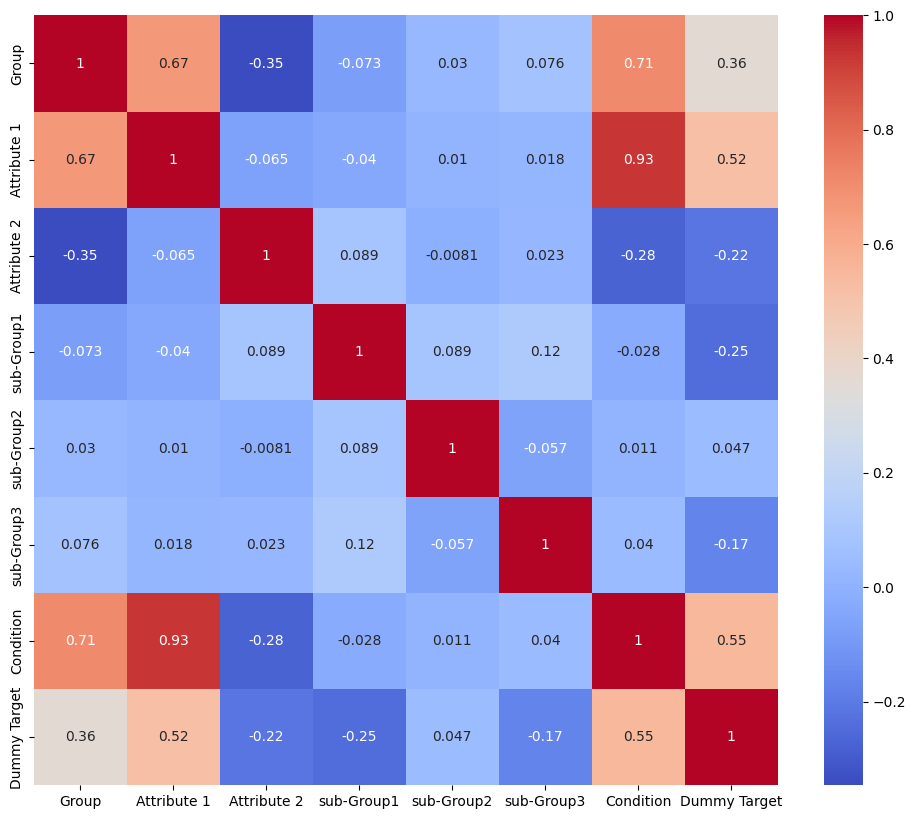

In [5]:
corr = numericalData.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Dummy Target Discretization**  
Numerical -> Categorical Data (Ordinal)

In [ ]:
dummyTarget = dataset["Dummy Target"]
numericalData["Dummy Target"] = pd.cut(dummyTarget, bins=5, labels=[1,2,3,4,5])

**Decision Tree**  
Target: Dummy Target

[Text(0.5783450704225352, 0.9375, 'x[1] <= 32.5\ngini = 0.734\nsamples = 633\nvalue = [37, 139, 224, 182, 51]'),
 Text(0.3257042253521127, 0.8125, 'x[3] <= 1.5\ngini = 0.691\nsamples = 508\nvalue = [35, 134, 209, 130, 0]'),
 Text(0.16901408450704225, 0.6875, 'x[5] <= 1.5\ngini = 0.659\nsamples = 247\nvalue = [10, 46, 109, 82, 0]'),
 Text(0.09154929577464789, 0.5625, 'x[6] <= 0.5\ngini = 0.648\nsamples = 225\nvalue = [8, 37, 99, 81, 0]'),
 Text(0.056338028169014086, 0.4375, 'x[0] <= 1.5\ngini = 0.648\nsamples = 201\nvalue = [6, 36, 91, 68, 0]'),
 Text(0.028169014084507043, 0.3125, 'x[5] <= 0.5\ngini = 0.626\nsamples = 166\nvalue = [2, 27, 78, 59, 0]'),
 Text(0.014084507042253521, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]'),
 Text(0.04225352112676056, 0.1875, 'x[4] <= 0.5\ngini = 0.624\nsamples = 165\nvalue = [2, 26, 78, 59, 0]'),
 Text(0.028169014084507043, 0.0625, 'gini = 0.637\nsamples = 102\nvalue = [1, 19, 46, 36, 0]'),
 Text(0.056338028169014086, 0.0625, 'gini = 0.5

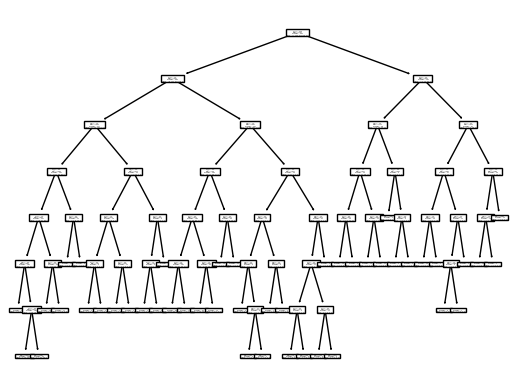

In [6]:
label = numericalData["Dummy Target"]
otherFeatures = numericalData.drop(["Dummy Target"], axis=1)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(otherFeatures,label)

tree.plot_tree(dtree)

**Appendix: Scatterplot**

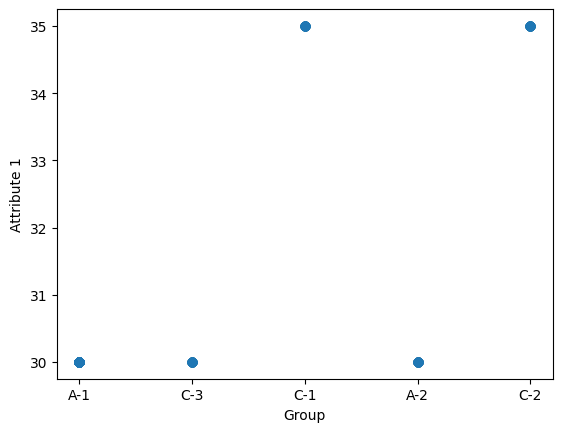

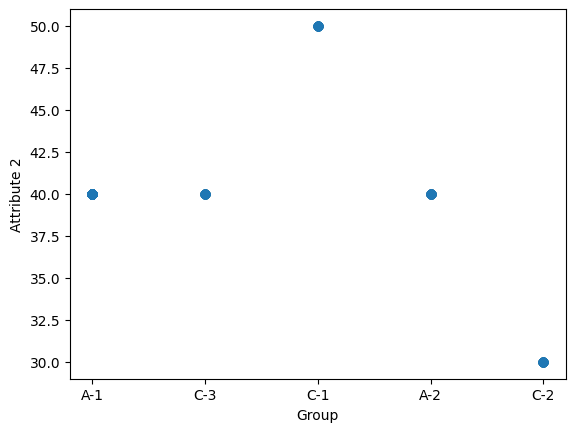

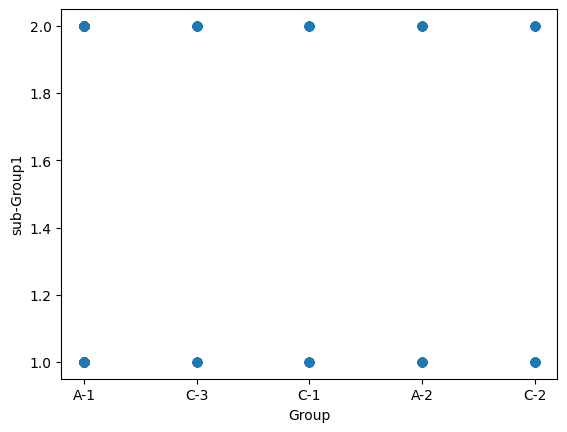

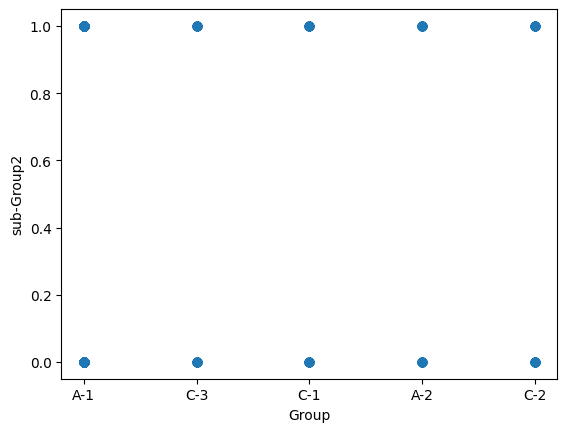

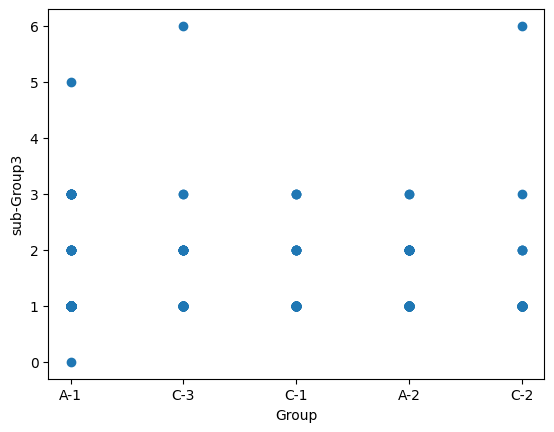

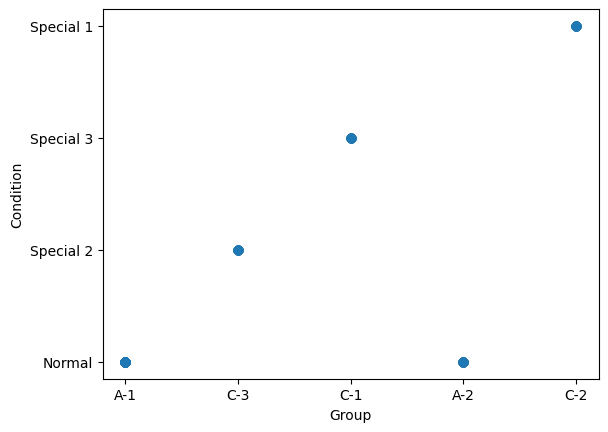

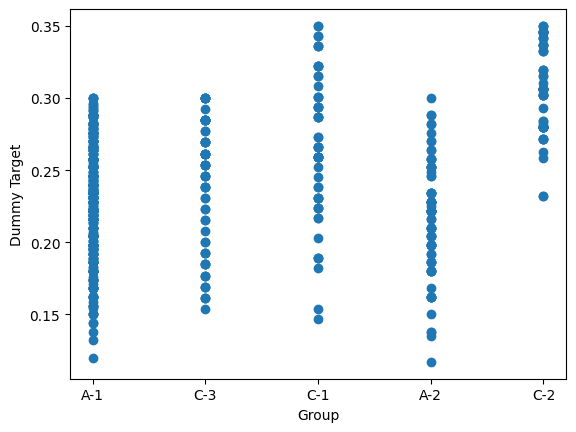

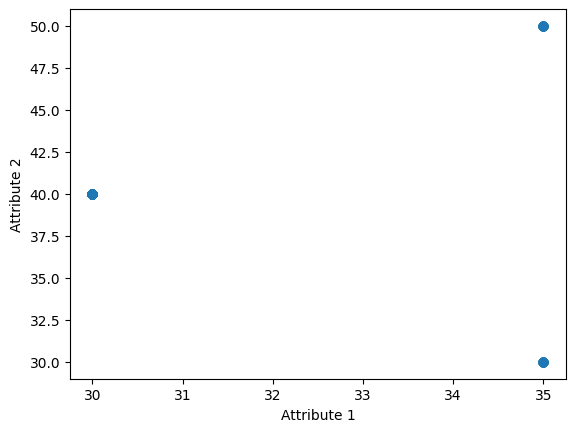

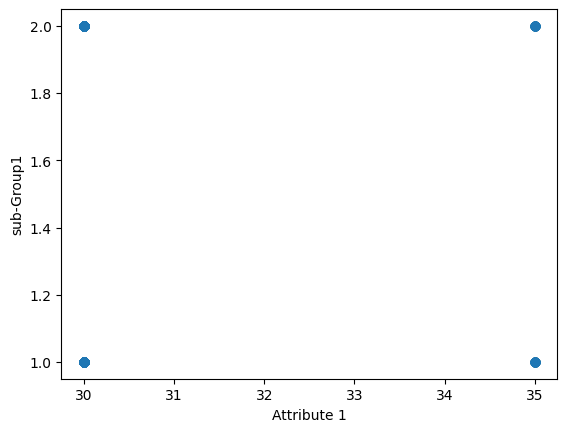

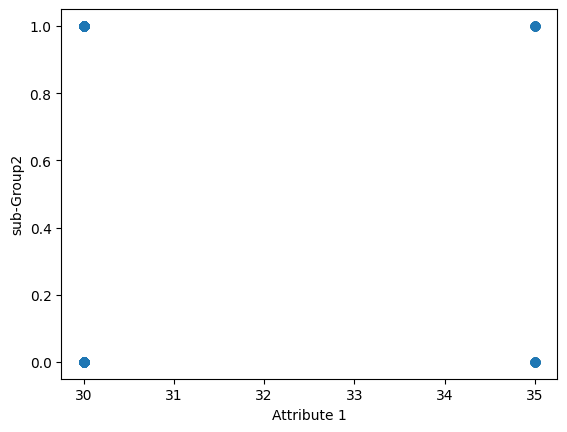

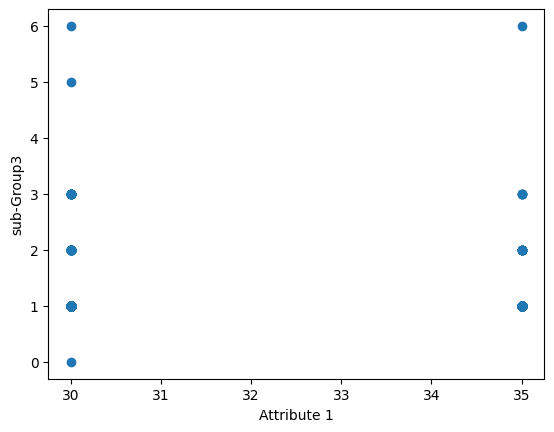

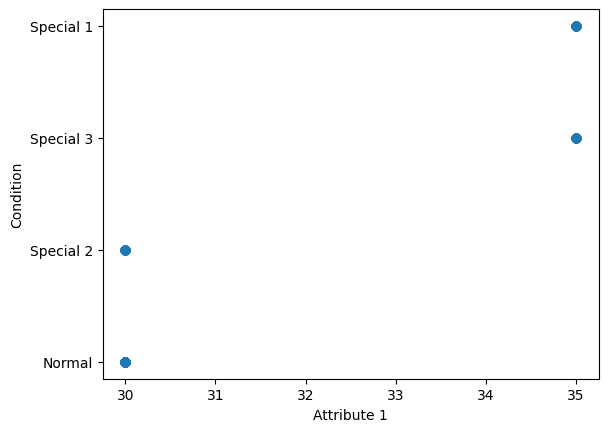

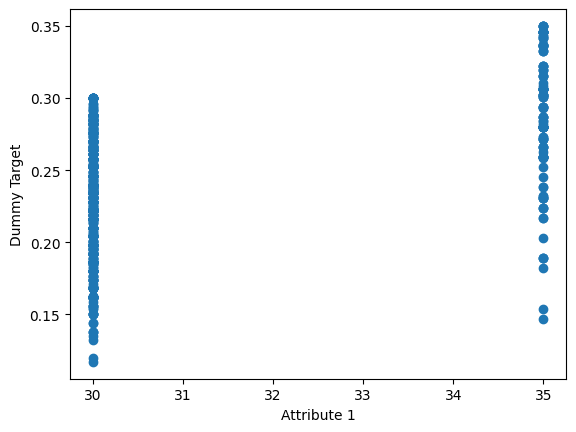

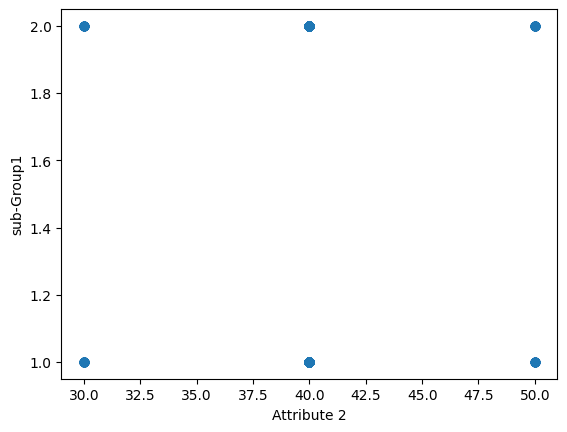

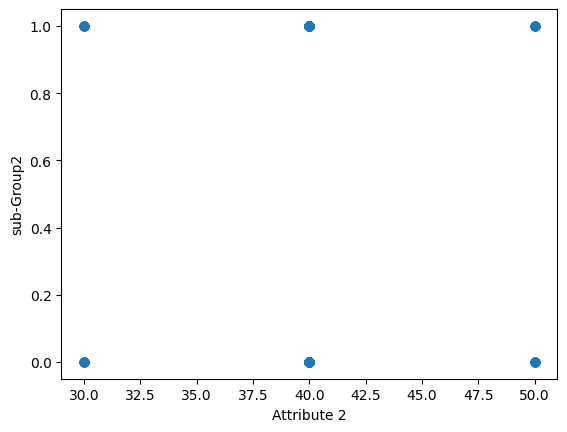

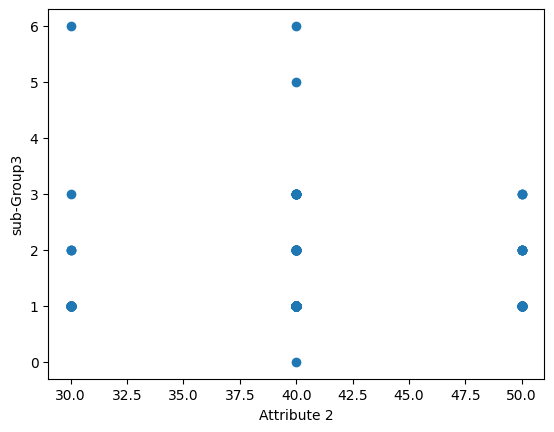

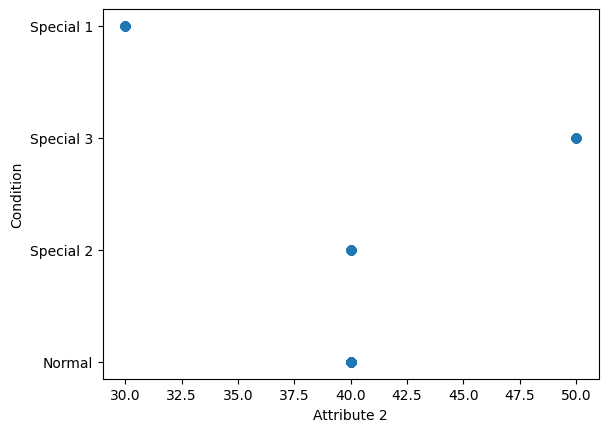

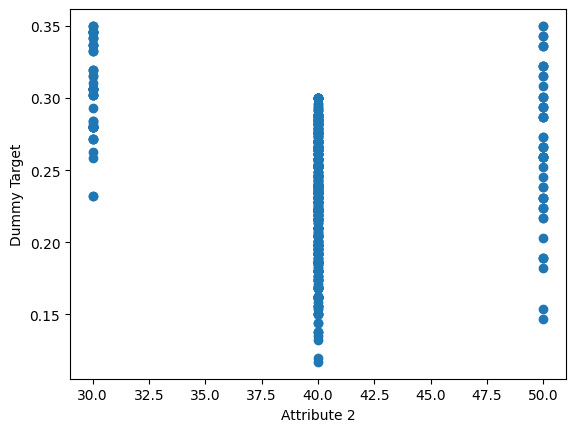

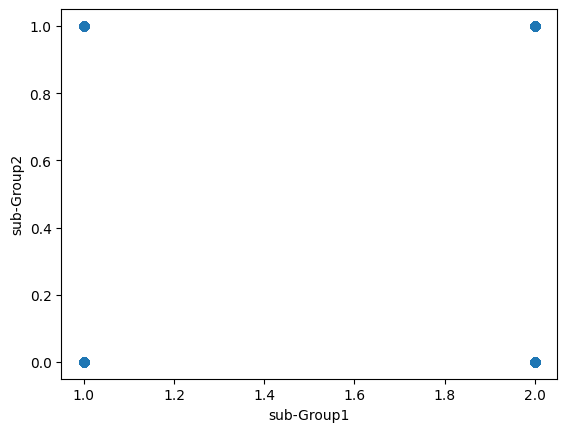

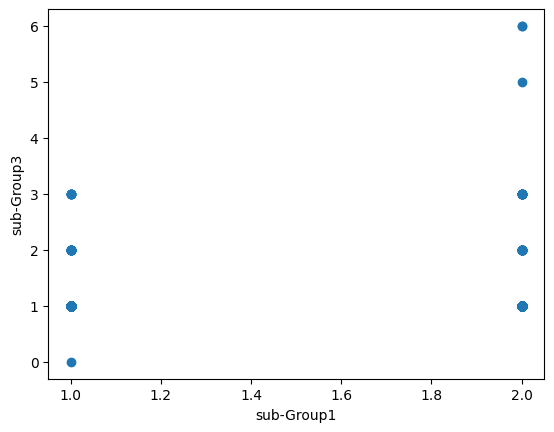

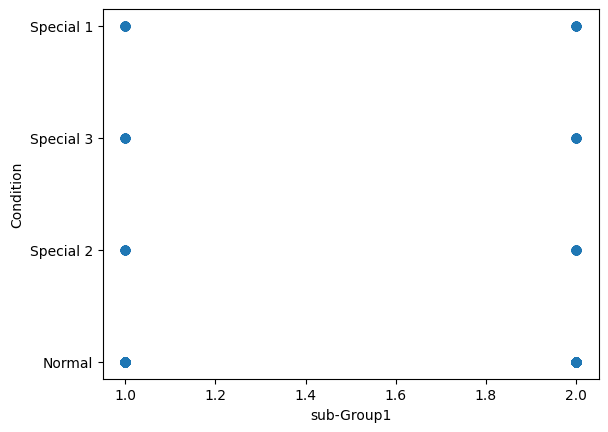

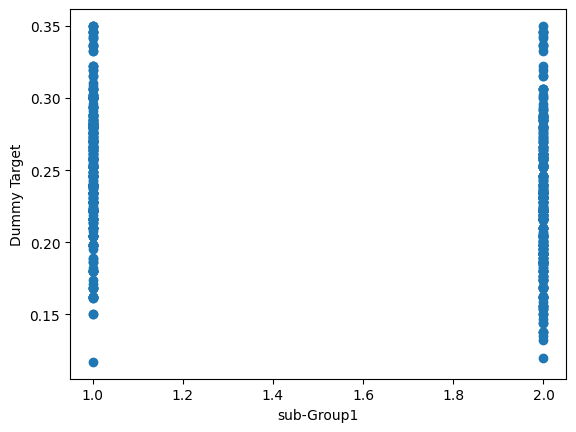

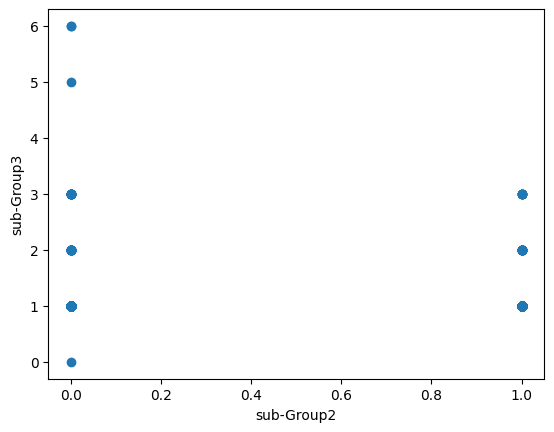

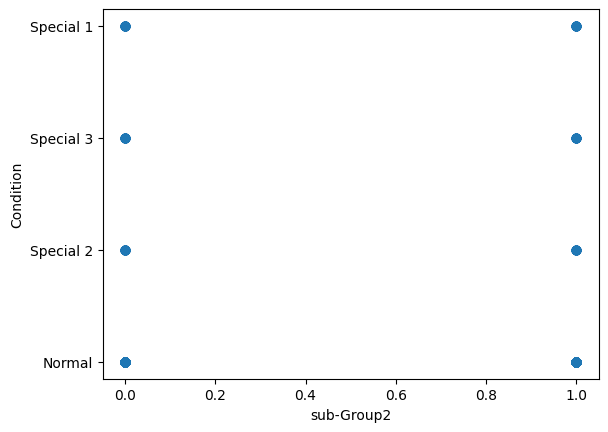

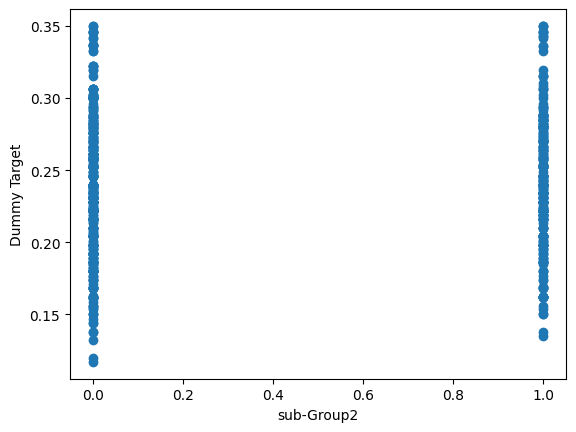

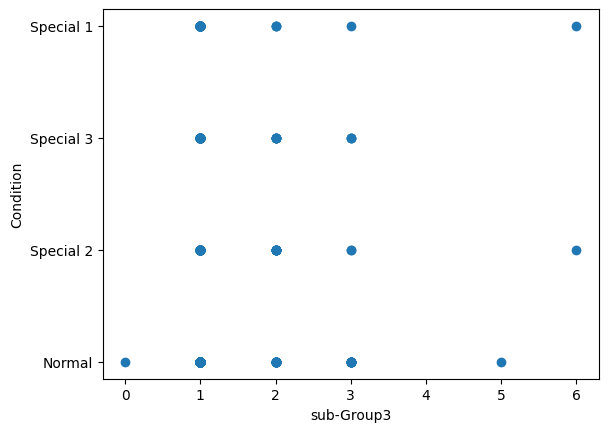

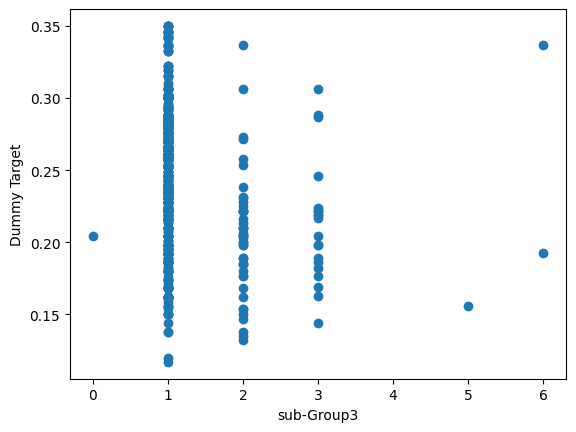

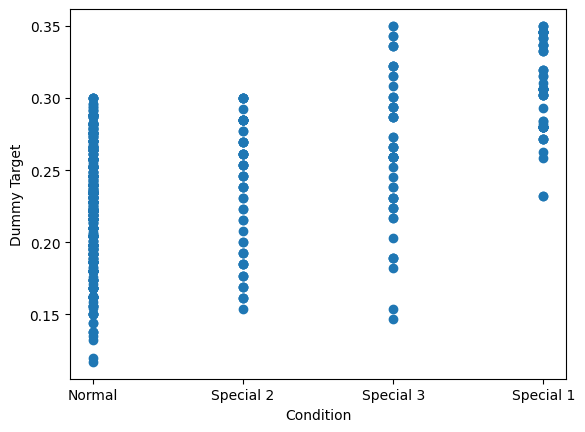

In [7]:
completed = []

for colX in dataset:
    for colY in dataset:
        if colX == colY or colY in completed:
            continue 
        plt.scatter(dataset[colX], dataset[colY])
        plt.xlabel(colX)
        plt.ylabel(colY)
        plt.show()
    completed.append(colX)